# Library

In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, RobustScaler # 데이터 표준화

%matplotlib inline

# Data Load

In [254]:
# 엑셀 파일 불러오기
Train_set = pd.read_csv('./data/train.csv', header = 0, index_col =0)
Test_set = pd.read_csv('./data/test.csv', header = 0, index_col =0)
Submission_set = pd.read_csv('./data/sample_submission.csv', header = 0, index_col = 0)
Train_set

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


# Data Preview

In [3]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 0 to 319999
Data columns (total 19 columns):
u            320000 non-null float64
g            320000 non-null float64
r            320000 non-null float64
i            320000 non-null float64
z            320000 non-null float64
redshift     320000 non-null float64
dered_u      320000 non-null float64
dered_g      320000 non-null float64
dered_r      320000 non-null float64
dered_i      320000 non-null float64
dered_z      320000 non-null float64
nObserve     320000 non-null int64
nDetect      320000 non-null int64
airmass_u    320000 non-null float64
airmass_g    320000 non-null float64
airmass_r    320000 non-null float64
airmass_i    320000 non-null float64
airmass_z    320000 non-null float64
class        320000 non-null int64
dtypes: float64(16), int64(3)
memory usage: 48.8 MB


In [4]:
Train_set.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000,320000.000000
mean,19.852429,18.376837,17.735761,17.174226,16.875187,0.058308,19.628874,18.227087,17.615434,17.152347,16.869277,6.332700,6.138816,1.175763,1.176528,1.175131,1.175430,1.176128,1.116322
std,1.945548,31.110759,1.466242,52.561464,57.146264,0.575457,1.923586,17.786568,1.473020,25.075760,35.436549,8.881129,8.551634,0.116297,0.118065,0.114723,0.115485,0.117156,0.923455
min,-17.687512,-17555.365606,7.731354,-23955.817764,-23955.817764,-166.048260,-42.837530,-9999.000000,-16.380230,-9999.000000,-9999.000000,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724150,17.474851,16.877190,16.523876,16.288890,0.000036,18.563598,17.348370,16.787138,16.453048,16.234063,1.000000,1.000000,1.088220,1.088448,1.087763,1.088021,1.088299,0.000000
50%,19.419439,18.140528,17.525850,17.149736,16.917610,0.047129,19.264635,18.022410,17.443415,17.087370,16.869390,2.000000,2.000000,1.179350,1.179235,1.179375,1.179377,1.179303,1.000000
75%,20.432092,19.073172,18.428089,18.007435,17.728924,0.094597,20.197603,18.888443,18.291078,17.906960,17.655653,5.000000,5.000000,1.227540,1.225990,1.229236,1.228599,1.226757,2.000000
max,58.623328,46.338272,72.009662,50.164052,52.612664,62.323343,30.777850,30.613170,31.957200,32.016220,30.781270,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


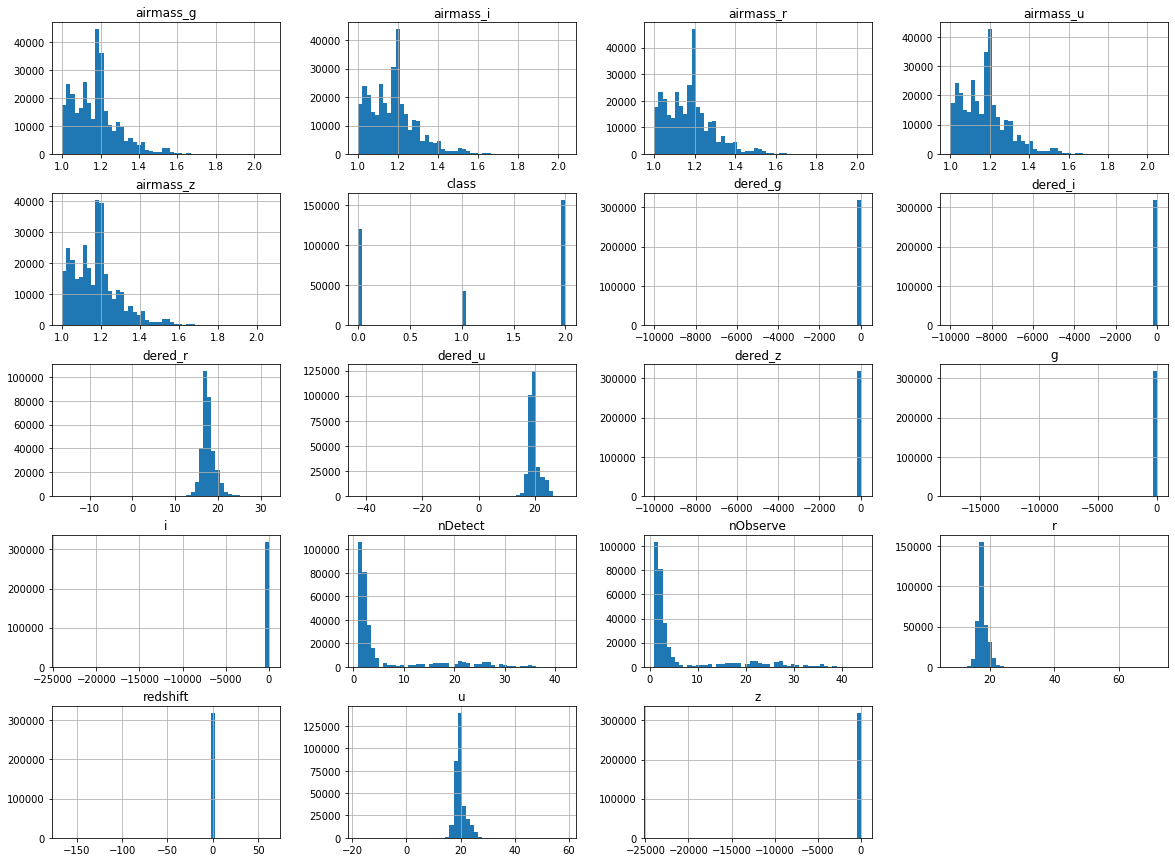

In [5]:
# 데이터 히스토그램
Train_set.hist(bins = 50, figsize=(20,15))
plt.show()

In [6]:
Train_set.hist?

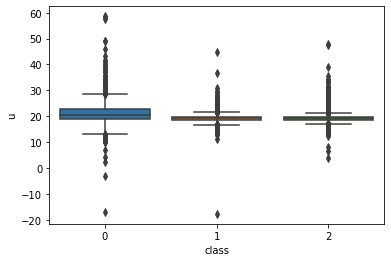

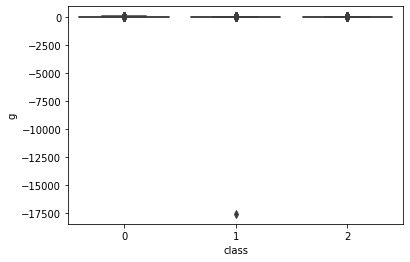

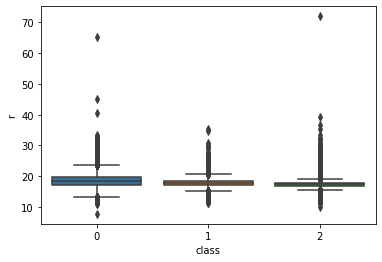

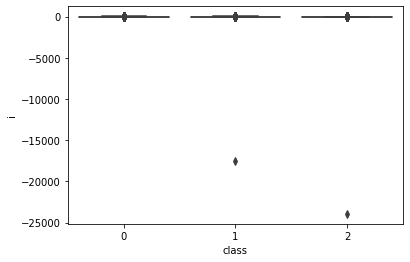

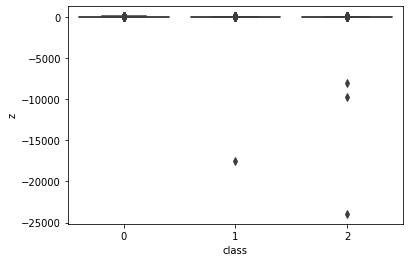

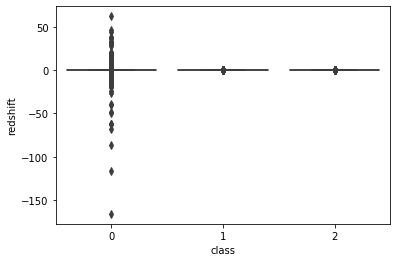

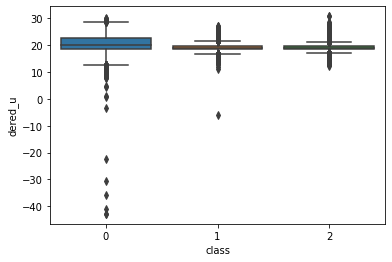

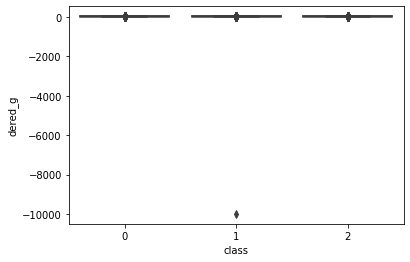

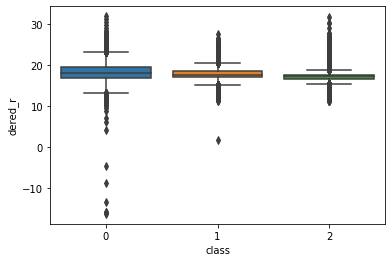

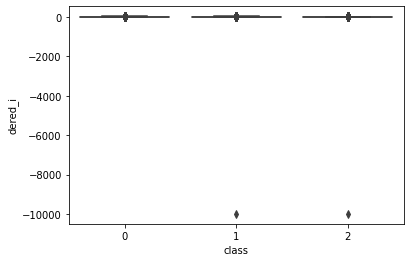

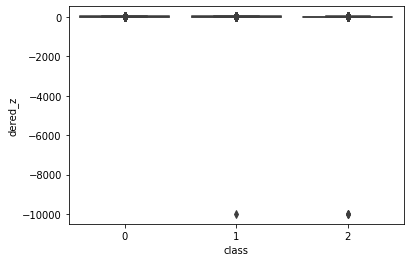

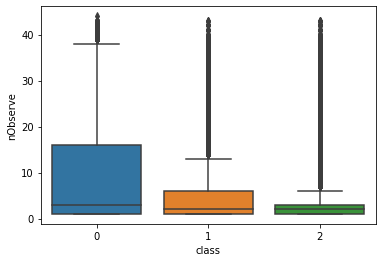

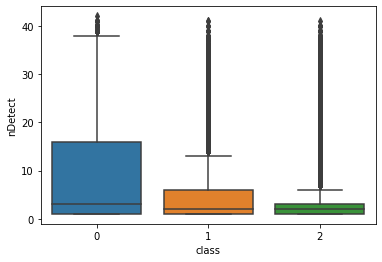

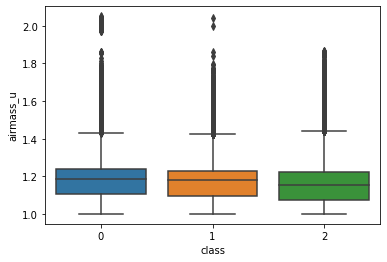

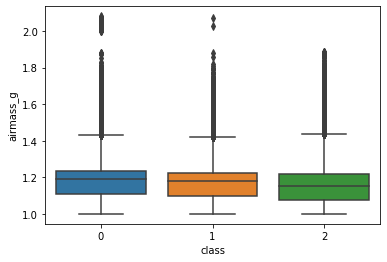

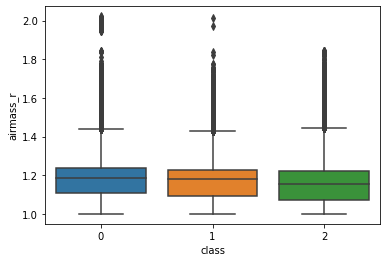

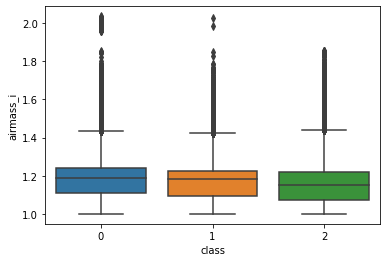

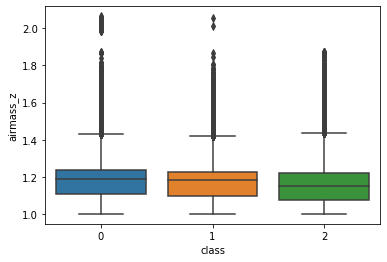

In [6]:
for i in list(Train_set.columns)[:-1]:
    sns.boxplot(x= Train_set['class'], y = Train_set[i])
    plt.show()

In [9]:
# 데이터 공분산
Train_set.corr()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
u,1.000000,0.048621,0.818125,0.017466,0.014199,-0.009243,0.935217,0.081037,0.782799,0.034951,0.021438,0.227273,0.221087,0.076302,0.076066,0.076441,0.076385,0.076197,-0.379313
g,0.048621,1.000000,0.049739,0.591288,0.543726,-0.000360,0.046967,0.998955,0.048157,0.707392,0.500364,0.011722,0.011415,0.001999,0.001934,0.002064,0.002032,0.001967,-0.019501
r,0.818125,0.049739,1.000000,0.022797,0.019127,-0.006304,0.805675,0.085505,0.969504,0.047424,0.030600,0.205900,0.195569,0.076337,0.075987,0.076592,0.076478,0.076175,-0.374905
i,0.017466,0.591288,0.022797,1.000000,0.919717,-0.000152,0.017510,0.590351,0.022486,0.987939,0.699012,0.005619,0.005580,-0.000755,-0.000829,-0.000679,-0.000718,-0.000792,-0.010138
z,0.014199,0.543726,0.019127,0.919717,1.000000,-0.000164,0.014029,0.542776,0.018913,0.908595,0.918965,0.005214,0.005192,-0.001465,-0.001521,-0.001406,-0.001436,-0.001493,-0.009960
redshift,-0.009243,-0.000360,-0.006304,-0.000152,-0.000164,1.000000,-0.007582,-0.000194,-0.002980,-0.000109,-0.000199,-0.007774,-0.007607,0.001382,0.001393,0.001370,0.001376,0.001387,0.073773
dered_u,0.935217,0.046967,0.805675,0.017510,0.014029,-0.007582,1.000000,0.086856,0.840528,0.037958,0.023229,0.222395,0.216898,0.088256,0.087821,0.088580,0.088433,0.088053,-0.337930
dered_g,0.081037,0.998955,0.085505,0.590351,0.542776,-0.000194,0.086856,1.000000,0.088660,0.707221,0.500081,0.019654,0.019033,0.005871,0.005777,0.005959,0.005916,0.005825,-0.030445
dered_r,0.782799,0.048157,0.969504,0.022486,0.018913,-0.002980,0.840528,0.088660,1.000000,0.049042,0.031533,0.199952,0.189958,0.083917,0.083433,0.084297,0.084121,0.083689,-0.341305
dered_i,0.034951,0.707392,0.047424,0.987939,0.908595,-0.000109,0.037958,0.707221,0.049042,1.000000,0.707473,0.011156,0.010817,0.001782,0.001696,0.001867,0.001825,0.001739,-0.018306


# Data Preprocessing

## 1. outlier 제거

In [280]:
# 전체 데이터가 아닌 각 클래스별(0,1,2)로 이상치 처리
Train_copy1 = Train_set.copy()

def remove_outlier(data, column):
    
    print(column)
    # 클래스 0처리
    column_data_0 = data[data['class']==0][column]
    quan_25_0 = np.percentile(column_data_0.values, 0.1) # 1분위수
    quan_75_0 = np.percentile(column_data_0.values, 99.9) # 3분위수
    iqr_0 = quan_75_0 - quan_25_0 # IQR 계산
    iqr_0 *= 1.5
    lowest_0 = quan_25_0 - iqr_0 # 최솟값 설정
    highest_0 = quan_75_0 + iqr_0 # 최댓값 설정
    outlier_index_0 = column_data_0[(column_data_0 < lowest_0) | (column_data_0 > highest_0)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_0))
    
    # 클래스 1처리
    column_data_1 = data[data['class']==1][column]
    quan_25_1 = np.percentile(column_data_1.values, 0.1) # 1분위수
    quan_75_1 = np.percentile(column_data_1.values, 99.9) # 3분위수
    iqr_1 = quan_75_1 - quan_25_1 # IQR 계산
    iqr_1 *= 1.5
    lowest_1 = quan_25_1 - iqr_1 # 최솟값 설정
    highest_1 = quan_75_1 + iqr_1 # 최댓값 설정
    outlier_index_1 = column_data_1[(column_data_1 < lowest_1 )| (column_data_1 > highest_1)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_1))
    
    # 클래스 2 처리
    column_data_2 = data[data['class']==2][column]
    quan_25_2 = np.percentile(column_data_2.values, 0.1) # 1분위수
    quan_75_2 = np.percentile(column_data_2.values, 99.9) # 3분위수
    iqr_2 = quan_75_2 - quan_25_2 # IQR 계산
    iqr_2 *= 1.5
    lowest_2 = quan_25_2 - iqr_2 # 최솟값 설정
    highest_2 = quan_75_2 + iqr_2 # 최댓값 설정
    outlier_index_2 = column_data_2[(column_data_2 < lowest_2 )| (column_data_2 > highest_2)].index # 최솟값 ~ 최댓값 사이의 값만 출력
    print(len(outlier_index_2))
    # outlier 행 제거
    data.drop(list(set(list(outlier_index_0) + list(outlier_index_1) + list(outlier_index_2))), axis = 0, inplace = True)
    print(data.shape)
    return data

In [220]:
Train_set_copy1_c = list(Train_set.columns[:-1])
Train_set_copy1_c.remove('redshift')
Train_set_copy1_c

['u',
 'g',
 'r',
 'i',
 'z',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'nObserve',
 'nDetect',
 'airmass_u',
 'airmass_g',
 'airmass_r',
 'airmass_i',
 'airmass_z']

In [221]:
Train_copy1 = Train_set.copy()
for col in Train_set_copy1_c:
    ROT = remove_outlier(Train_copy1, col)
    
    Train_copy1 = ROT

Train_copy1

u
10
3
14
(319973, 19)
g
6
4
8
(319955, 19)
r
1
1
16
(319937, 19)
i
11
3
16
(319907, 19)
z
13
6
10
(319878, 19)
dered_u
7
1
0
(319870, 19)
dered_g
0
0
0
(319870, 19)
dered_r
0
0
1
(319869, 19)
dered_i
0
0
2
(319867, 19)
dered_z
0
0
0
(319867, 19)
nObserve
0
0
0
(319867, 19)
nDetect
0
0
0
(319867, 19)
airmass_u
0
0
0
(319867, 19)
airmass_g
0
0
0
(319867, 19)
airmass_r
0
0
0
(319867, 19)
airmass_i
0
0
0
(319867, 19)
airmass_z
0
0
0
(319867, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


In [222]:
Train_copy1.drop(Train_copy1[(Train_copy1['redshift']<-6) | (Train_copy1['redshift'] > 6)].index, axis = 0, inplace = True)
Train_copy1

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,2,2,1.093010,1.088828,1.097310,1.095145,1.090905,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,2,2,1.051689,1.050838,1.052640,1.052152,1.051252,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,31,30,1.193259,1.194140,1.192509,1.192868,1.193683,0


In [223]:
Train_copy1.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000,319772.000000
mean,19.850029,18.429720,17.733352,17.301718,17.057536,0.059406,19.629095,18.257882,17.614710,17.213740,16.992872,6.332737,6.139565,1.175755,1.176520,1.175123,1.175421,1.176119,1.116642
std,1.928770,1.649806,1.451936,1.306840,1.311841,0.111661,1.905719,1.653705,1.462968,1.320006,1.319413,8.881100,8.552260,0.116289,0.118056,0.114716,0.115477,0.117147,0.923393
min,2.265091,6.794582,7.731354,7.711483,5.128114,-5.732517,0.753796,3.082781,6.040316,6.856107,7.256706,1.000000,1.000000,1.000059,1.000012,1.000157,1.000105,1.000027,0.000000
25%,18.724024,17.474680,16.877109,16.523833,16.288694,0.000036,18.563510,17.348345,16.787227,16.453085,16.233877,1.000000,1.000000,1.088212,1.088445,1.087759,1.088005,1.088289,0.000000
50%,19.419027,18.140169,17.525546,17.149450,16.917226,0.047147,19.264320,18.022105,17.443125,17.087120,16.868975,2.000000,2.000000,1.179347,1.179231,1.179368,1.179374,1.179299,1.000000
75%,20.429982,19.070803,18.425758,18.005703,17.726773,0.094588,20.195973,18.886430,18.288925,17.905020,17.653802,5.000000,5.000000,1.227517,1.225961,1.229216,1.228572,1.226732,2.000000
max,40.228626,33.856596,32.996460,30.647060,30.451421,5.971282,29.961020,30.613170,31.957200,29.801860,28.580620,44.000000,42.000000,2.050775,2.080287,2.022134,2.036329,2.065390,2.000000


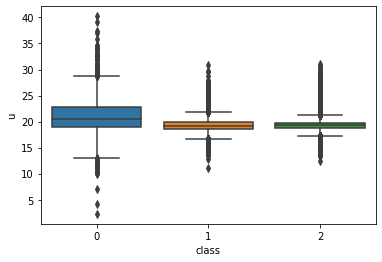

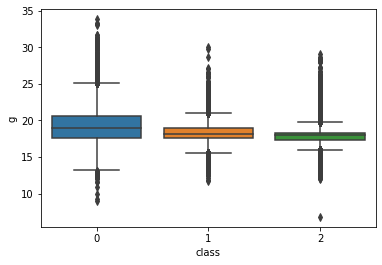

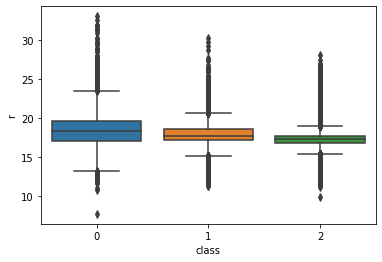

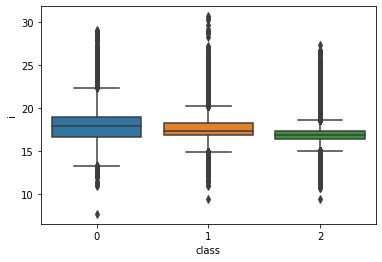

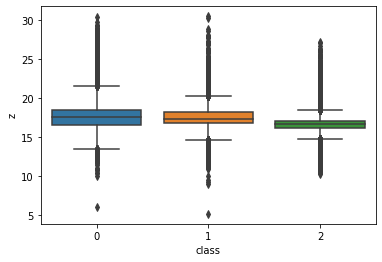

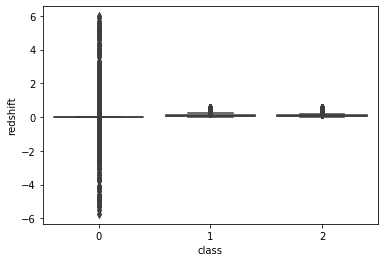

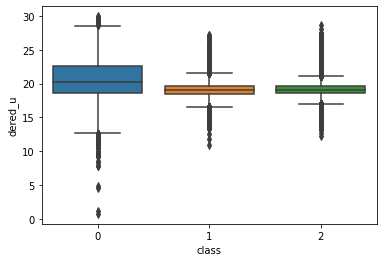

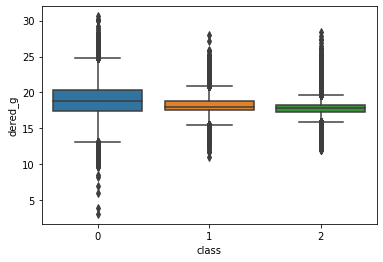

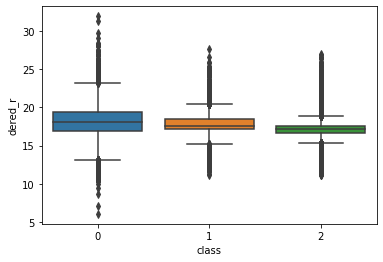

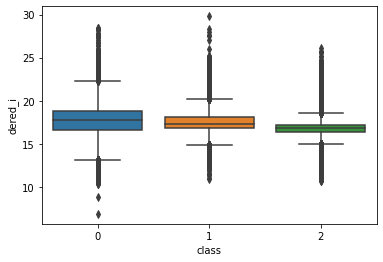

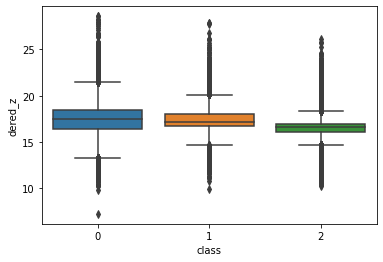

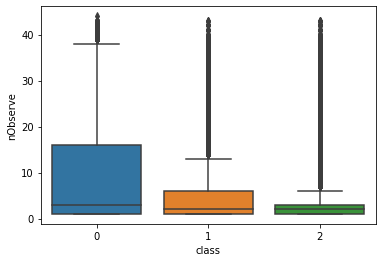

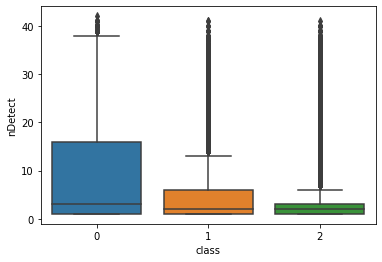

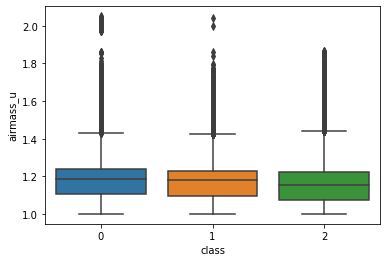

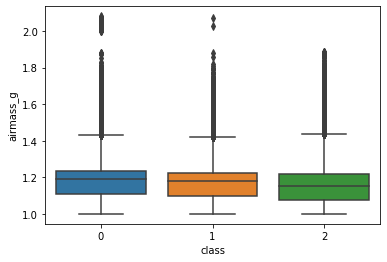

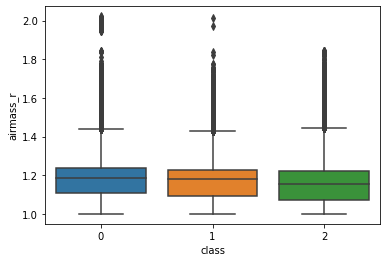

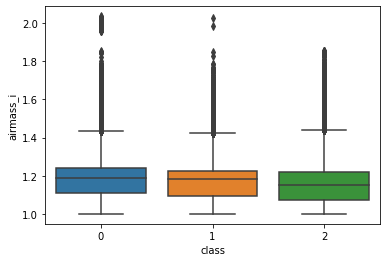

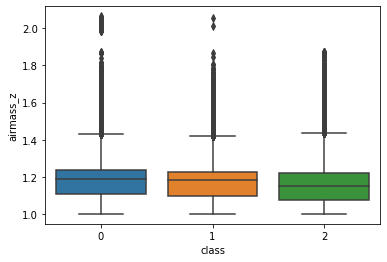

In [224]:
for i in list(Train_copy1.columns)[:-1]:
    sns.boxplot(x= Train_copy1['class'], y = Train_copy1[i])
    plt.show()

In [257]:
for i in list(Train_copy1.columns)[:-1]:
    print(i,'왜도 : ',Train_copy1[i].skew())
    print(i,'첨도 : ',Train_copy1[i].kurt())

u 왜도 :  1.3070251065281346
u 첨도 :  5.357701479823829
g 왜도 :  -563.2677572399424
g 첨도 :  318177.90735180693
r 왜도 :  1.2314532969428373
r 첨도 :  12.94254029918765
i 왜도 :  -413.27219809472876
i 첨도 :  174270.37668770828
z 왜도 :  -346.08369166215516
z 첨도 :  128655.03176154823
redshift 왜도 :  -121.79627361903762
redshift 첨도 :  31998.864438171782
dered_u 왜도 :  0.4155880818216796
dered_u 첨도 :  15.940840039109236
dered_g 왜도 :  -558.238510767991
dered_g 첨도 :  314395.86136242177
dered_r 왜도 :  0.5494419625135254
dered_r 첨도 :  5.955374037177695
dered_i 왜도 :  -398.3129824339013
dered_i 첨도 :  159099.42783257112
dered_z 왜도 :  -282.24464064633366
dered_z 첨도 :  79772.29699084267
nObserve 왜도 :  1.8311757954669843
nObserve 첨도 :  2.1790200449073276
nDetect 왜도 :  1.8063696396029518
nDetect 첨도 :  2.0155439829396227
airmass_u 왜도 :  1.0046561281433568
airmass_u 첨도 :  1.8702402544195915
airmass_g 왜도 :  1.0678081505185901
airmass_g 첨도 :  2.0790312652195584
airmass_r 왜도 :  0.9415747482469975
airmass_r 첨도 :  1.661259

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016AE6344D48>,
      dtype=object)

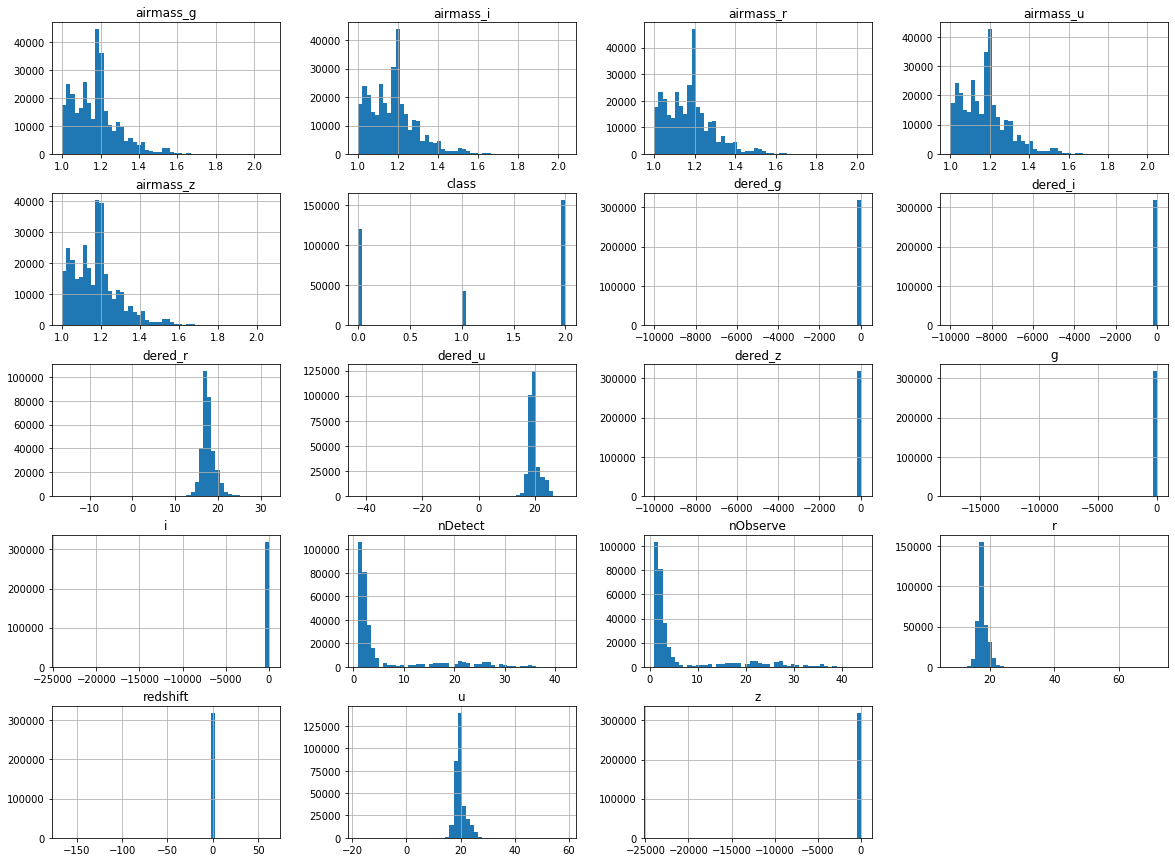

In [258]:
Train_copy1.hist(bins = 50, figsize=(20,15))

In [259]:
# 첨도부분 처리
Train_copy1['airmass_g'] = np.sqrt(np.log(Train_copy1['airmass_g']))
Train_copy1['airmass_i'] = np.sqrt(np.log(Train_copy1['airmass_i']))
Train_copy1['airmass_r'] = np.sqrt(np.log(Train_copy1['airmass_r']))
#Train_copy1['airmass_r'] = np.log(Train_copy1['airmass_r'])
#Train_copy1['airmass_u'] = np.log1p(np.log1p(Train_copy1['airmass_u']))
#Train_copy1['airmass_z'] = np.log1p(np.log1p(Train_copy1['airmass_z']))
Train_copy1['airmass_u'] = np.sqrt(np.log(Train_copy1['airmass_u']))
Train_copy1['airmass_z'] = np.sqrt(np.log(Train_copy1['airmass_z']))

#Train_copy1['nDetect'] = np.log(Train_copy1['nDetect'])
Train_copy1['nDetect'] = np.log(Train_copy1['nDetect'])
#Train_copy1['nObserve'] = np.log1p(Train_copy1['nObserve']) #sqrt ,cbrt
Train_copy1['nObserve'] = np.log(Train_copy1['nObserve'])

#Train_copy1.drop(['airmass_g', 'airmass_i', 'airmass_r', 'airmass_u', 'nDetect', 'nObserve'], axis = 1, inplace = True)

Train_copy1

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,2.890372,2.890372,0.416839,0.417762,0.416047,0.416427,0.417285,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,0.000000,0.000000,0.475125,0.478950,0.471331,0.473224,0.477033,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,0.693147,0.693147,0.149163,0.154334,0.144104,0.146619,0.151736,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,1.386294,1.098612,0.432216,0.432848,0.431712,0.431948,0.432516,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,2.564949,2.484907,0.421027,0.421364,0.420820,0.420908,0.421179,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,0.693147,0.693147,0.298220,0.291722,0.304732,0.301474,0.294971,2
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,0.693147,0.693147,0.224494,0.222683,0.226498,0.225472,0.223566,1
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,3.433987,3.401197,0.420343,0.421220,0.419594,0.419953,0.420765,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B39C9AF48>,
      dtype=object)

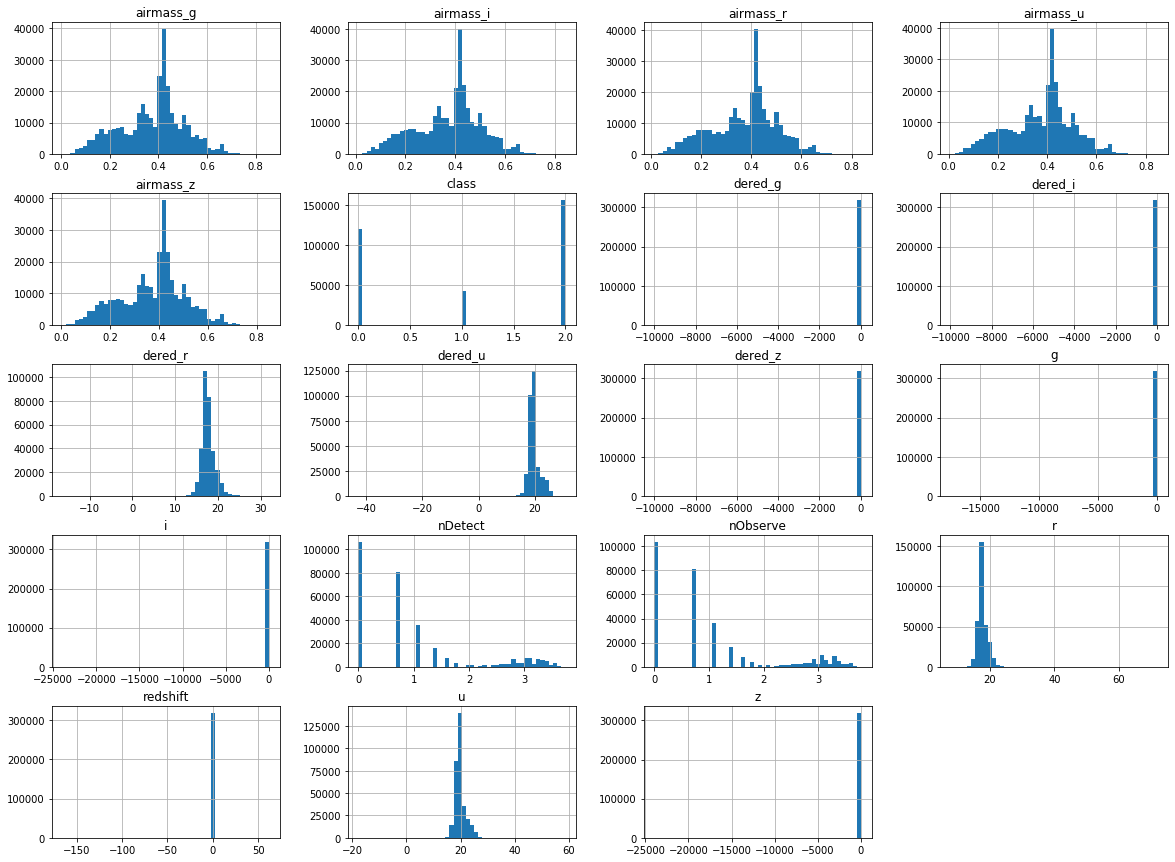

In [260]:
Train_copy1.hist(bins = 50, figsize=(20,15))

### Test_set

In [261]:
Test_set

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.143050,18.017200,17.473255,17.114411,16.926293,0.121303,19.07495,17.95495,17.43085,17.08381,16.90872,1,1,1.156348,1.151487,1.161321,1.158819,1.153902
320001,18.740910,17.170473,16.369084,15.986452,15.730708,-0.000067,15.07033,14.30976,14.39011,14.51600,14.63716,2,2,1.007637,1.007383,1.007975,1.007795,1.007500
320002,19.298048,17.880346,17.222135,16.809561,16.635239,0.110010,19.10036,17.77263,17.14601,16.74968,16.56888,1,1,1.380859,1.390490,1.371502,1.376145,1.385635
320003,18.077467,17.156943,16.904111,16.811800,16.795520,0.000030,17.97294,17.07353,16.84696,16.76995,16.76677,1,1,1.140796,1.140808,1.140903,1.140834,1.140787
320004,17.832467,16.764587,16.213526,15.872181,15.662084,0.068471,17.75447,16.67943,16.15628,15.83145,15.64335,2,2,1.111023,1.107658,1.114511,1.112750,1.109325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.673388,18.661662,18.270788,18.122501,18.062672,-0.000317,19.33614,18.39331,18.08600,17.98610,17.96699,17,17,1.185843,1.186322,1.185493,1.185652,1.186067
399996,21.522869,20.728282,20.608695,21.004875,20.845799,0.065455,21.39935,20.63992,20.54506,20.95069,20.78268,8,4,1.284956,1.290772,1.279329,1.282120,1.287838
399997,19.399065,18.241076,18.160492,18.197753,18.201831,-0.000842,18.91359,17.87533,17.90469,18.00426,18.04000,1,1,1.188475,1.188563,1.188518,1.188480,1.188503


In [262]:
Test_set.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,19.859840,18.437104,17.739743,17.306491,17.148951,0.060083,19.634952,18.263779,17.619340,17.217804,16.870231,6.349950,6.15775,1.175956,1.176733,1.175311,1.175616,1.176326
std,1.954254,1.702973,1.478590,1.320742,24.643062,0.346845,1.921030,1.665741,1.476002,1.332361,35.436707,8.872794,8.55086,0.116424,0.118197,0.114845,0.115609,0.117285
min,-0.338524,-51.175280,-5.438650,5.326743,-39.527151,-30.148965,-30.633700,-18.655990,-8.756023,-3.697258,-9999.000000,1.000000,1.00000,1.000143,1.000086,1.000177,1.000150,1.000148
25%,18.727258,17.477982,16.881969,16.525463,16.288210,0.000034,18.570860,17.352245,16.790630,16.456230,16.230968,1.000000,1.00000,1.088091,1.088294,1.087693,1.087911,1.088175
50%,19.426062,18.145087,17.529944,17.155994,16.921198,0.047115,19.267415,18.024665,17.448660,17.091210,16.873305,2.000000,2.00000,1.179353,1.179252,1.179373,1.179390,1.179326
75%,20.434422,19.079345,18.434472,18.007966,17.733311,0.094769,20.199885,18.894768,18.295210,17.910950,17.657802,5.000000,5.00000,1.227833,1.226165,1.229388,1.228922,1.226935
max,56.847135,94.359125,46.691343,33.025919,6976.392220,46.390495,30.889910,30.952920,31.653620,30.947770,28.644080,44.000000,42.00000,2.050215,2.079697,2.021604,2.035784,2.064815


In [263]:
Test_copy = Test_set.copy()
Test_copy['airmass_g'] = np.sqrt(np.log(Test_copy['airmass_g']))
Test_copy['airmass_i'] = np.sqrt(np.log(Test_copy['airmass_i']))
Test_copy['airmass_r'] = np.sqrt(np.log(Test_copy['airmass_r']))
Test_copy['airmass_u'] = np.sqrt(np.log(Test_copy['airmass_u']))
Test_copy['airmass_z'] = np.sqrt(np.log(Test_copy['airmass_z']))
Test_copy['nDetect'] = np.log(Test_copy['nDetect'])
Test_copy['nObserve'] = np.log(Test_copy['nObserve'])
Test_copy

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
320000,19.143050,18.017200,17.473255,17.114411,16.926293,0.121303,19.07495,17.95495,17.43085,17.08381,16.90872,0.000000,0.000000,0.381139,0.375572,0.386727,0.383929,0.378351
320001,18.740910,17.170473,16.369084,15.986452,15.730708,-0.000067,15.07033,14.30976,14.39011,14.51600,14.63716,0.693147,0.693147,0.087224,0.085766,0.089126,0.088118,0.086441
320002,19.298048,17.880346,17.222135,16.809561,16.635239,0.110010,19.10036,17.77263,17.14601,16.74968,16.56888,0.000000,0.000000,0.568072,0.574157,0.562056,0.565054,0.571103
320003,18.077467,17.156943,16.904111,16.811800,16.795520,0.000030,17.97294,17.07353,16.84696,16.76995,16.76677,0.000000,0.000000,0.362941,0.362956,0.363070,0.362987,0.362930
320004,17.832467,16.764587,16.213526,15.872181,15.662084,0.068471,17.75447,16.67943,16.15628,15.83145,15.64335,0.693147,0.693147,0.324471,0.319762,0.329265,0.326855,0.322105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.673388,18.661662,18.270788,18.122501,18.062672,-0.000317,19.33614,18.39331,18.08600,17.98610,17.96699,2.833213,2.833213,0.412861,0.413349,0.412503,0.412666,0.413089
399996,21.522869,20.728282,20.608695,21.004875,20.845799,0.065455,21.39935,20.63992,20.54506,20.95069,20.78268,2.079442,1.386294,0.500724,0.505213,0.496322,0.498513,0.502956
399997,19.399065,18.241076,18.160492,18.197753,18.201831,-0.000842,18.91359,17.87533,17.90469,18.00426,18.04000,0.000000,0.000000,0.415537,0.415626,0.415581,0.415542,0.415565


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B3F66C588>,
      dtype=object)

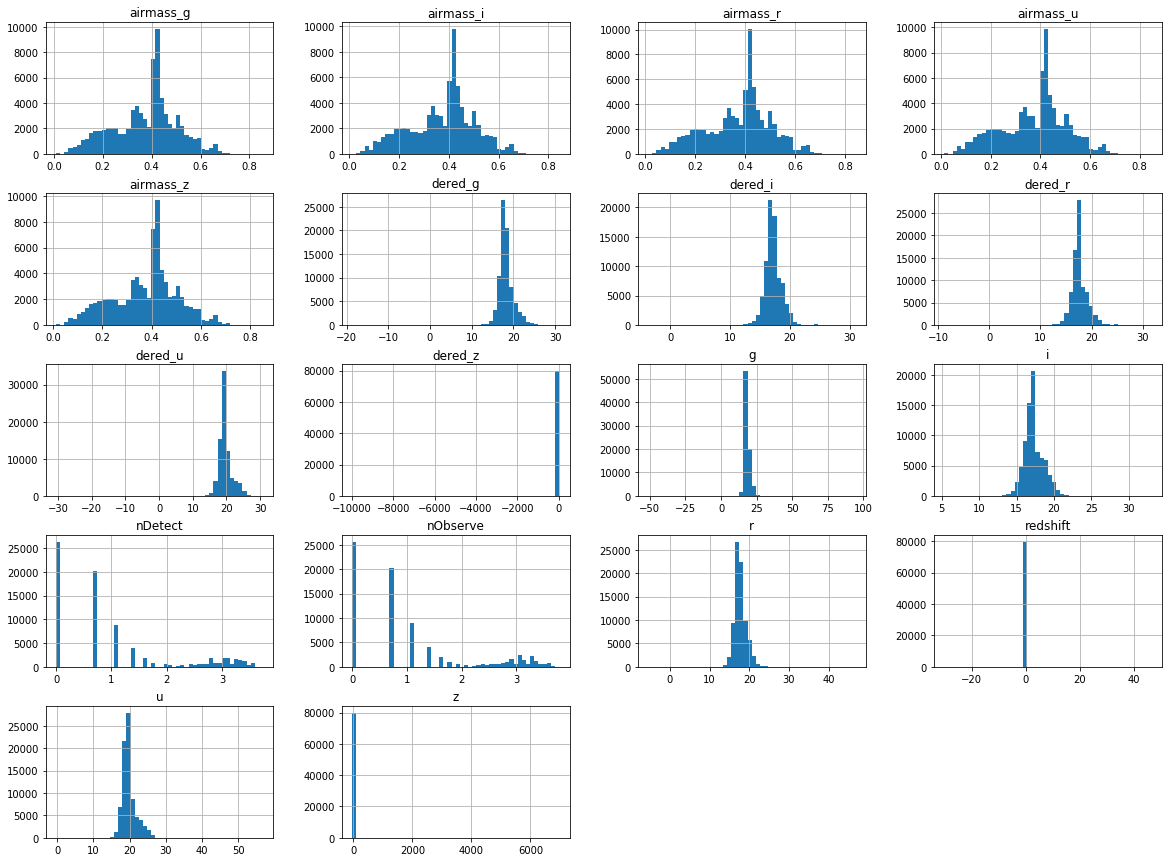

In [264]:
Test_copy.hist(bins = 50, figsize=(20,15))

# 2. 표준화

In [265]:
Y = Train_copy1['class']
X = Train_copy1.drop(['class'], axis = 1)
X

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
id,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,2.890372,2.890372,0.416839,0.417762,0.416047,0.416427,0.417285
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,0.000000,0.000000,0.475125,0.478950,0.471331,0.473224,0.477033
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,0.693147,0.693147,0.149163,0.154334,0.144104,0.146619,0.151736
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,1.386294,1.098612,0.432216,0.432848,0.431712,0.431948,0.432516
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,2.564949,2.484907,0.421027,0.421364,0.420820,0.420908,0.421179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,18.365648,17.240883,16.773898,16.484970,16.340403,0.051988,18.13280,17.04065,16.63744,16.38606,16.28741,0.693147,0.693147,0.298220,0.291722,0.304732,0.301474,0.294971
319996,18.685639,17.665802,17.190434,16.816858,16.636688,0.087261,18.52074,17.51310,17.08711,16.74363,16.60173,0.693147,0.693147,0.224494,0.222683,0.226498,0.225472,0.223566
319997,21.188972,18.423357,17.295610,16.901072,16.684127,-0.000010,20.98896,18.30760,17.21518,16.84030,16.63555,3.433987,3.401197,0.420343,0.421220,0.419594,0.419953,0.420765


In [266]:
# 표준화 : RobustScaler() :
# 이상치, 특이값에 덜 민감한" 중앙값(median)과 IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법
#  (x-median)/IQR )

x_RobustScaler = RobustScaler().fit_transform(X)
x_RobustScaler

array([[ 2.25096502,  1.37409575,  0.95663898, ...,  0.0600454 ,
         0.06271842,  0.06933883],
       [-2.55704925, -2.55177875, -2.62649742, ...,  0.39660101,
         0.41055817,  0.44000846],
       [-1.54165324, -1.44845966, -1.28282507, ..., -1.59548077,
        -1.58964468, -1.57808804],
       ...,
       [ 1.03606177,  0.17695395, -0.14845576, ...,  0.08164247,
         0.08431449,  0.09093327],
       [-0.33505355, -0.51424183, -0.65776116, ..., -0.04433429,
        -0.04478945, -0.04463071],
       [ 0.25820525,  0.42503254,  0.63816509, ..., -1.02752911,
        -1.03929336, -1.06313516]])

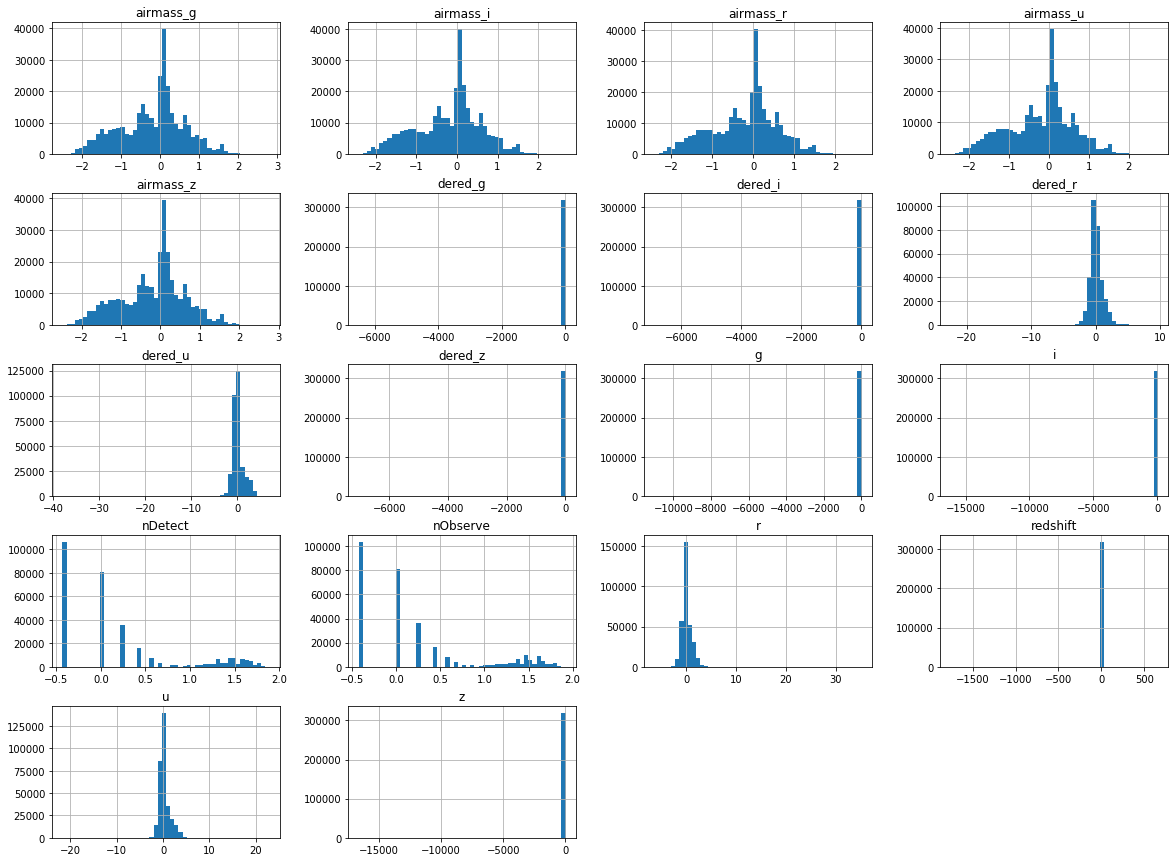

In [267]:
X = pd.DataFrame(x_RobustScaler, columns = X.columns)
X.hist(bins = 50,  figsize=(20,15))
plt.show()

## Test set

In [268]:
Test_copy = pd.DataFrame(RobustScaler().fit_transform(Test_copy), columns = Test_copy.columns)
Test_copy


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
0,-0.165778,-0.079861,-0.036514,-0.028049,0.003526,0.783107,-0.118147,-0.045195,-0.011837,-0.005087,0.024821,-0.430677,-0.430677,-0.153993,-0.189733,-0.118250,-0.136000,-0.171968
1,-0.401339,-0.608615,-0.747734,-0.788897,-0.823811,-0.498044,-2.576440,-2.408331,-2.032826,-1.770244,-1.567206,0.000000,0.000000,-1.962851,-1.993552,-1.927266,-1.942497,-1.978950
2,-0.074986,-0.165322,-0.198266,-0.233681,-0.197882,0.663900,-0.102549,-0.163391,-0.201152,-0.234774,-0.213357,-0.430677,-0.430677,0.996461,1.046310,0.947506,0.970119,1.021208
3,-0.789962,-0.617064,-0.403112,-0.232171,-0.086968,-0.497024,-0.794632,-0.616610,-0.399912,-0.220840,-0.074665,-0.430677,-0.430677,-0.265988,-0.268259,-0.262054,-0.263891,-0.267424
4,-0.933475,-0.862078,-0.847932,-0.865976,-0.871298,0.225424,-0.928743,-0.872101,-0.858964,-0.865981,-0.862016,0.000000,0.000000,-0.502749,-0.537105,-0.467542,-0.484544,-0.520139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.144876,0.322585,0.477194,0.651943,0.789892,-0.500686,0.042188,0.238988,0.423600,0.615163,0.766511,1.329698,1.329698,0.041235,0.045405,0.038430,0.039493,0.043071
79996,1.228240,1.613123,1.983088,2.596204,2.715798,0.193586,1.308718,1.695440,2.057983,2.653074,2.739893,0.861353,0.430677,0.581977,0.617188,0.547937,0.563756,0.599365
79997,-0.015814,0.059942,0.406149,0.702703,0.886190,-0.506223,-0.217200,-0.096812,0.303095,0.627647,0.817680,-0.430677,-0.430677,0.057706,0.059575,0.057137,0.057059,0.058398
79998,-0.308297,-0.339847,-0.255758,-0.225057,-0.226030,-0.045377,-0.304406,-0.347927,-0.261196,-0.223589,-0.220632,1.329698,1.329698,0.006896,0.013451,0.001782,0.004043,0.009903


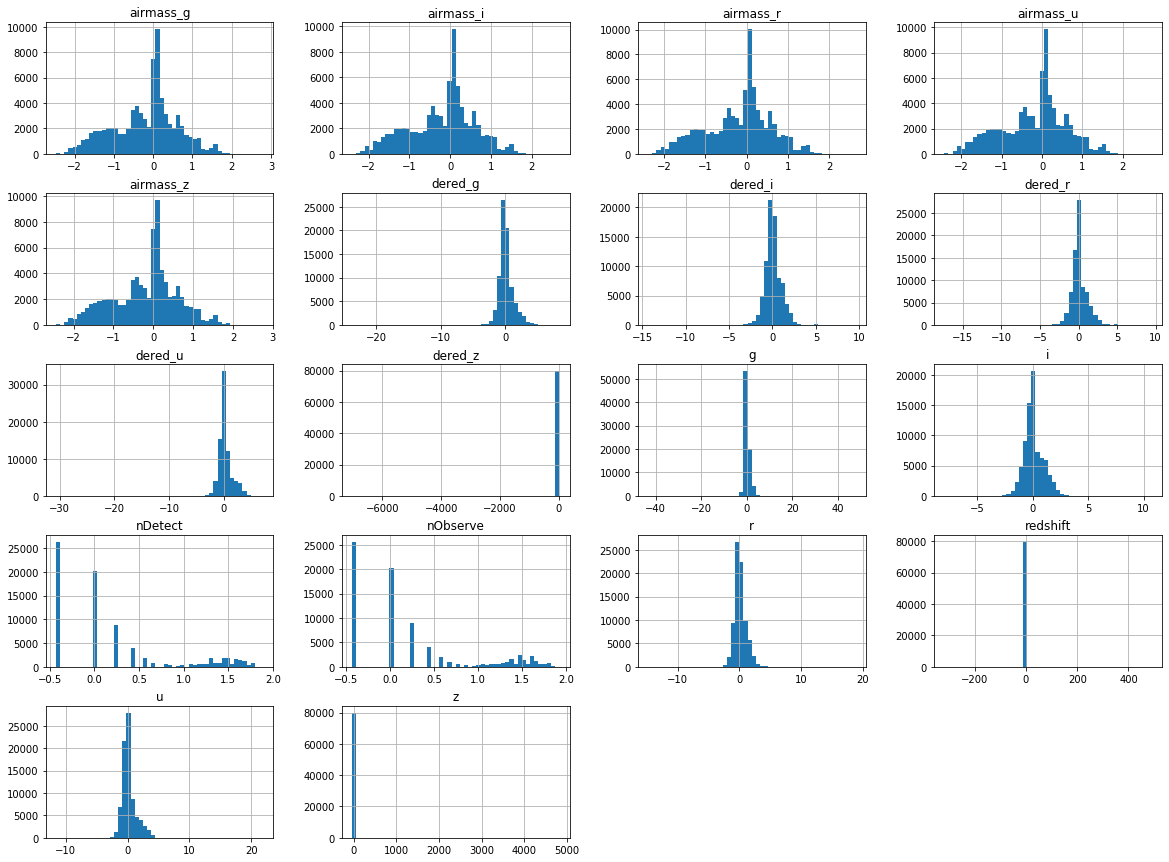

In [269]:
Test_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

# Spilting X, Y

In [270]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.05 # Testing size
#X = updating_Train
#X = updating_Train.drop('class', axis = 1)
#Y = updating_Train['class']
X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = size, random_state = seed)  

# modeling

In [271]:
model = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model.fit(X_Train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=27,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1050, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb.XGBClassifier?

# Evaluation

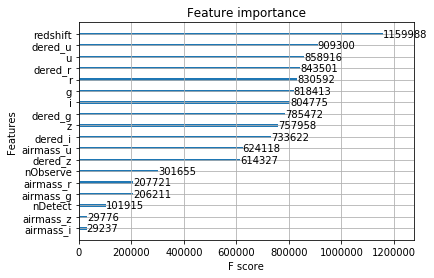

In [272]:
# plot importance(model)
plot_importance(model)

In [273]:
# 예측 평가
y_pred = model.predict(X_Test)
y_pred

array([2, 2, 2, ..., 2, 1, 0], dtype=int64)

In [274]:
# evaluate predictions
mean_squared_error(y_test, y_pred)

0.0699375

In [275]:
# confusion matrix
confusion_matrix(y_pred, y_test)

array([[6078,    4,    4],
       [   5, 1477,  372],
       [  10,  682, 7368]], dtype=int64)

In [276]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}%".format(accuracy * 100.0))

Accuracy: 93.26875%


In [277]:
#  Test set에 적용
result = model.predict(Test_copy)
Submission_set['class'] = result
Submission_set.to_csv("submission.csv", encoding='utf-8')

In [278]:
Submission_set

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2
...,...
399995,0
399996,2
399997,0


## Whole Data

In [279]:
model2 = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model2.fit(X, Y)

result2 = model2.predict(Test_copy)
Submission_set['class'] = result2
Submission_set.to_csv("submission1.csv", encoding='utf-8')

==============================================================================================

# 파라미터 튜닝

In [13]:
for i in range(1, 30):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = i, learning_rate = 0.1)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

1 번째 학습
MSE : 0.13
[[11986    15    20]
 [   19   420    83]
 [   35  3853 15569]]
Accuracy: 87.421875%
2 번째 학습
MSE : 0.10
[[11991     7     8]
 [   22  1729   487]
 [   27  2552 15177]]
Accuracy: 90.303125%
3 번째 학습
MSE : 0.09
[[12000     6     5]
 [   19  2025   546]
 [   21  2257 15121]]
Accuracy: 91.08125%
4 번째 학습
MSE : 0.09
[[12001     6     4]
 [   17  2222   626]
 [   22  2060 15042]]
Accuracy: 91.453125%
5 번째 학습
MSE : 0.08
[[12005     6     2]
 [   16  2295   613]
 [   19  1987 15057]]
Accuracy: 91.740625%
6 번째 학습
MSE : 0.08
[[12006     7     1]
 [   15  2434   648]
 [   19  1847 15023]]
Accuracy: 92.071875%
7 번째 학습
MSE : 0.08
[[12010     6     3]
 [   14  2489   663]
 [   16  1793 15006]]
Accuracy: 92.203125%
8 번째 학습
MSE : 0.08
[[12005     6     4]
 [   18  2564   686]
 [   17  1718 14982]]
Accuracy: 92.346875%
9 번째 학습
MSE : 0.08
[[12008     6     3]
 [   15  2616   691]
 [   17  1666 14978]]
Accuracy: 92.50625%
10 번째 학습
MSE : 0.07
[[12004     6     2]
 [   17  2665   664]
 [  

In [19]:
for i in range(100, 2000, 50):
    print(i, "번째 학습")
    model = xgb.XGBClassifier(max_depth = 14, n_estimators= i, learning_rate = 0.01)
    model.fit(X_Train, y_train)
    
    # 예측 평가
    y_pred = model.predict(X_Test)
    
    # evaluate predictions
    MSE = mean_squared_error(y_test, y_pred)
    print('MSE : %.2f'%MSE)
    # confusion matrix
    CM = confusion_matrix(y_pred, y_test)
    print(CM)
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {}%".format(accuracy * 100.0))

100 번째 학습
MSE : 0.08
[[12006     5     7]
 [   16  2672   714]
 [   18  1611 14951]]
Accuracy: 92.590625%
150 번째 학습
MSE : 0.08
[[12007     5     8]
 [   16  2692   707]
 [   17  1591 14957]]
Accuracy: 92.675%
200 번째 학습
MSE : 0.07
[[12008     5     7]
 [   16  2720   703]
 [   16  1563 14962]]
Accuracy: 92.78125%
250 번째 학습
MSE : 0.07
[[12009     5     5]
 [   16  2730   713]
 [   15  1553 14954]]
Accuracy: 92.790625%
300 번째 학습
MSE : 0.07
[[12008     5     5]
 [   17  2751   715]
 [   15  1532 14952]]
Accuracy: 92.846875%
350 번째 학습
MSE : 0.07
[[12008     5     4]
 [   17  2771   708]
 [   15  1512 14960]]
Accuracy: 92.934375%
400 번째 학습
MSE : 0.07
[[12008     5     4]
 [   16  2772   711]
 [   16  1511 14957]]
Accuracy: 92.928125%
450 번째 학습
MSE : 0.07
[[12010     5     3]
 [   15  2785   716]
 [   15  1498 14953]]
Accuracy: 92.9625%
500 번째 학습
MSE : 0.07
[[12009     5     3]
 [   15  2790   714]
 [   16  1493 14955]]
Accuracy: 92.98125%
550 번째 학습
MSE : 0.07
[[12009     6     3]
 [   15  27

KeyboardInterrupt: 

# 아웃라이어 제거한 모델 학습

In [88]:
# 모델 평가를 위한 훈련데이터 Split
seed = 0
size = 0.1 # Testing size
X1 = Train_copy1.drop(['class'], axis = 1)
Y1 = Train_copy1['class']
X_Train1, X_Test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = size, random_state = seed)  

print(X_Train1.shape)

model1 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model1.fit(X_Train1, y_train1)
    
    # 예측 평가
y_pred1 = model1.predict(X_Test1)
    
    # evaluate predictions
MSE = mean_squared_error(y_test1, y_pred1)
print('MSE : %.2f'%MSE)
    # confusion matrix
CM = confusion_matrix(y_pred1, y_test1)
print(CM)
    # accuracy
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy: {}%".format(accuracy * 100.0))

result1 = model1.predict(Test_set)
Submission_set['class'] = result1
Submission_set.to_csv("submission1.csv", encoding='utf-8')

(286633, 18)
MSE : 0.07
[[12057    10     6]
 [   16  2757   715]
 [   10  1395 14883]]
Accuracy: 93.24311595340514%


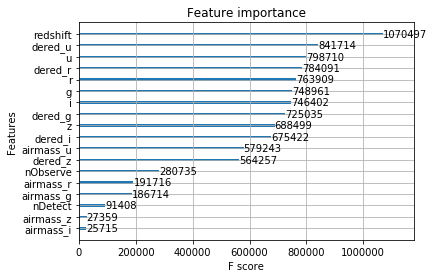

In [89]:
# plot importance(model)
plot_importance(model1)

In [90]:
# 모델 평가를 위한 훈련데이터 Split

model3 = xgb.XGBClassifier(max_depth = 27, n_estimators= 1050, learning_rate = 0.01)
model3.fit(X1, Y1)
    
result3 = model3.predict(Test_set)
Submission_set['class'] = result3
Submission_set.to_csv("submission3.csv", encoding='utf-8')

# whole Data

In [39]:
model2 = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
model2.fit(X, Y)

result2 = model2.predict(Test_set)
Submission_set['class'] = result2
Submission_set.to_csv("submission1.csv", encoding='utf-8')

NameError: name 'result1' is not defined